In [2]:
!pip3 install tqdm

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip3 install scipy

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
from pprint import pprint
import math
from scipy import log,exp,sqrt,stats
from tqdm import tqdm
import json

In [5]:
def read_json (filename) :
    with open(filename, encoding='utf-8') as file:
        data_dict = json.load(file)
    return data_dict  

def save_json (data_dict, filename) :
    if not filename :
        filename = "myjson.json"
    with open(filename, mode='w', encoding='utf-8') as file:
        json.dump(data_dict, file)

In [6]:
a = np.mean([1,2,3,4,5,6,7,8,9])
a

5.0

In [7]:
a = np.std([1,2,3,4,5,6,7,8,9])
a

2.581988897471611

In [8]:
a = np.exp([-1,0,1,10])
a

array([3.67879441e-01, 1.00000000e+00, 2.71828183e+00, 2.20264658e+04])

In [9]:
data = pd.read_csv("resources/dataset_train.csv")

In [10]:
data.head(10)

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.0,628.046051,-4.861976,-6.280461,NaN,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.0,411.412727,5.931832,-4.114127,2.769,-502.021336,439.351416,NaN,1041.091935,6.581791,-0.171704,-244.03492,72.25
8,8,Gryffindor,Bella,Leatherman,1998-12-07,Left,20278.0,496.394945,-5.215891,-4.963949,5.855,-626.552041,567.842402,-6.198661,925.255500,1.086518,1.147032,-252.27561,244.11
9,9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,46316.0,527.193585,7.922205,-5.271936,3.356,-398.101991,341.475606,4.978614,1041.414665,2.068824,-0.529579,-244.57527,-0.09


In [11]:
data.mean()

Index                              799.500000
Arithmancy                       49634.570243
Astronomy                           39.797131
Herbology                            1.141020
Defense Against the Dark Arts       -0.387863
Divination                           3.153910
Muggle Studies                    -224.589915
Ancient Runes                      495.747970
History of Magic                     2.963095
Transfiguration                   1030.096946
Potions                              5.950373
Care of Magical Creatures           -0.053427
Charms                            -243.374409
Flying                              21.958012
dtype: float64

In [12]:
data_clean = data.fillna(data.mean())
data_clean

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.000000,-487.886086,5.727180,4.878861,4.72200,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.000000,-552.060507,-5.987446,5.520605,-5.61200,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.000000,-366.076117,7.725017,3.660761,6.14000,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.000000,697.742809,-6.497214,-6.977428,4.02600,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.000000,436.775204,-7.820623,-0.387863,2.23600,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.000000,-613.687160,-4.289197,6.136872,-6.59200,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
6,6,Gryffindor,Tom,Guido,2000-09-30,Left,49167.000000,628.046051,-4.861976,-6.280461,3.15391,-926.892512,583.742442,-7.322486,923.539573,1.646666,0.153022,-257.83447,261.55
7,7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,33010.000000,411.412727,5.931832,-4.114127,2.76900,-502.021336,439.351416,2.963095,1041.091935,6.581791,-0.171704,-244.03492,72.25
8,8,Gryffindor,Bella,Leatherman,1998-12-07,Left,20278.000000,496.394945,-5.215891,-4.963949,5.85500,-626.552041,567.842402,-6.198661,925.255500,1.086518,1.147032,-252.27561,244.11
9,9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,46316.000000,527.193585,7.922205,-5.271936,3.35600,-398.101991,341.475606,4.978614,1041.414665,2.068824,-0.529579,-244.57527,-0.09


### Liste des variables

In [13]:
column_names_list = list(data_clean.columns)
column_names_list

['Index',
 'Hogwarts House',
 'First Name',
 'Last Name',
 'Birthday',
 'Best Hand',
 'Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

### Definir m

In [14]:
m = data_clean['Index'].shape[0]
m
type(m)

int

### Normalize numerical datas (6:19 column)

#### with pandas

In [15]:
df = data_clean[column_names_list[6:19]]
#data_norm = (df - df.mean()) / (df.max() - df.min())
data_norm = (df - df.mean()) / (df.std())
data_norm.head(10)

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.530220,-1.024497,0.887838,1.020284e+00,0.382059,1.032502,0.349485,0.519477,0.222006,-0.692712,0.802067,1.204553,-0.500330
1,1.066837,-1.149091,-1.380004,1.144605e+00,-2.135780,-0.546267,-1.217591,0.262050,0.660833,0.416386,0.151269,-1.002983,-1.386928
2,-1.571526,-0.788003,1.274600,7.843108e-01,0.727549,1.849266,1.016380,0.135708,1.328449,0.890954,-0.481532,1.825184,0.086673
3,-1.028243,1.277401,-1.478690,-1.276549e+00,0.212481,-0.649513,0.268601,-1.780343,-2.513099,-1.644695,0.041061,-1.533799,1.830165
4,0.637725,0.770733,-1.734890,1.075377e-17,-0.223645,-0.456707,0.985359,-1.467631,-2.122677,-0.525725,-0.219596,-1.481492,1.393217
5,-1.722603,-1.268740,-1.051239,1.263990e+00,-2.374553,-0.449919,-0.947017,0.553657,0.521109,1.860326,1.150216,-0.520409,-0.580222
6,-0.028335,1.142085,-1.162124,-1.141530e+00,0.000000,-1.460111,0.837122,-2.355911,-2.440983,-1.380196,0.215224,-1.646249,2.454041
7,-1.007457,0.721492,0.927456,-7.218621e-01,-0.093782,-0.576789,-0.536520,0.000000,0.251870,0.202495,-0.123305,-0.075198,0.515120
8,-1.779022,0.886485,-1.230638,-8.864920e-01,0.658110,-0.835693,0.685859,-2.098499,-2.401675,-1.559835,1.251483,-1.013384,2.275411
9,-0.201107,0.946280,1.312774,-9.461560e-01,0.049239,-0.360737,-1.467646,0.461654,0.259263,-1.244810,-0.496390,-0.136716,-0.225829


#### with python

In [16]:
#pour un feature
def centrer_reduire_feature (X):
    stdev = np.std(X)
    mean = np.mean(X)
    if stdev != 0:
        A = []
        for x in X :
            a = float((x - mean)/stdev)
            A.append(a)
        return np.array(A), stdev, mean
    else : 
        return X, stdev, mean

In [17]:
X0 = np.array([1,1,1,1])
X0_norm, mean, stdev = centrer_reduire_feature(X0)
X0_norm.shape
X0_norm[:10]

array([1, 1, 1, 1])

In [18]:
X2 = data_clean[column_names_list[6]]
X2 = np.array(X2)
X2_norm, mean, stdev = centrer_reduire_feature(X2)
X2_norm.shape
X2_norm[:10]

array([ 0.53038542,  1.06717044, -1.57201754, -1.02856438,  0.63792428,
       -1.72314177, -0.02834384, -1.00777192, -1.77957846, -0.20116983])

In [19]:
# pour plusieures features a la fois
def centrer_reduire_matrix(XXX):
    mean = np.mean(XXX,axis=0)
    stdev = np.std(XXX,axis=0)
    XXX = (XXX - mean)/stdev
    return XXX, mean, stdev

In [20]:

XXX = np.array([[1,1,1,1,1],[1,2,3,4,5]])
XXX_norm, mean, stdev = centrer_reduire_matrix(XXX)
XXX_norm.shape
df = pd.DataFrame(XXX_norm)
df.head(10)


/sgoinfre/goinfre/Perso/aslusarc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


,0,1,2,3,4
0,NaN,-1.0,-1.0,-1.0,-1.0
1,NaN,1.0,1.0,1.0,1.0


In [21]:
XXX = data_clean[column_names_list[6:19]]
XXX = np.array(XXX)
XXX_norm, mean, stdev = centrer_reduire_matrix(XXX)
XXX_norm.shape
df = pd.DataFrame(XXX_norm)
df.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.530385,-1.024817,0.888115,1.020603e+00,3.821785e-01,1.032825,0.349594,5.196393e-01,0.222075,-0.692929,0.802318,1.204930,-0.500486
1,1.067170,-1.149451,-1.380435,1.144963e+00,-2.136447e+00,-0.546438,-1.217971,2.621324e-01,0.661039,0.416516,0.151316,-1.003297,-1.387362
2,-1.572018,-0.788249,1.274999,7.845560e-01,7.277767e-01,1.849844,1.016698,1.357509e-01,1.328864,0.891232,-0.481683,1.825755,0.086700
3,-1.028564,1.277801,-1.479153,-1.276948e+00,2.125478e-01,-0.649717,0.268685,-1.780900e+00,-2.513885,-1.645209,0.041074,-1.534279,1.830738
4,0.637924,0.770974,-1.735432,1.075714e-16,-2.237150e-01,-0.456850,0.985667,-1.468090e+00,-2.123341,-0.525889,-0.219665,-1.481955,1.393652
5,-1.723142,-1.269136,-1.051568,1.264385e+00,-2.375295e+00,-0.450060,-0.947313,5.538306e-01,0.521272,1.860907,1.150576,-0.520571,-0.580403
6,-0.028344,1.142442,-1.162487,-1.141887e+00,-8.658754e-16,-1.460567,0.837383,-2.356648e+00,-2.441746,-1.380628,0.215291,-1.646764,2.454809
7,-1.007772,0.721717,0.927746,-7.220878e-01,-9.381106e-02,-0.576970,-0.536688,-3.052512e-16,0.251948,0.202559,-0.123343,-0.075221,0.515281
8,-1.779578,0.886762,-1.231023,-8.867692e-01,6.583159e-01,-0.835954,0.686074,-2.099156e+00,-2.402426,-1.560323,1.251874,-1.013701,2.276122
9,-0.201170,0.946576,1.313184,-9.464518e-01,4.925391e-02,-0.360850,-1.468105,4.617988e-01,0.259344,-1.245200,-0.496545,-0.136758,-0.225899


### Definir X 

In [22]:
print("Define X")
# Add a column of ones in X
X0 = np.ones(m)
print("X0 shape 1600 : ", X0.shape)
print("X0 sample with ones : ", X0[:10])



Define X
X0 shape 1600 :  (1600,)
X0 sample with ones :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
#Take text column Best Hand as X1
X1 = list(data_clean['Best Hand'])
print("X1: Best Hand text cathegories", set(X1))

X1: Best Hand text cathegories {'Right', 'Left'}


In [24]:
# convertir X1 en binaire
X1 = [0.0 if el == 'Left' else 1.0 for el in X1 ]
X1 = np.array(X1)
print("X1: Best Hand converted to binary cathegories", set(X1))
print("X1 shape 1600 : ", X1.shape)
print( "X1 sample : ", X1[:10])

X1: Best Hand converted to binary cathegories {0.0, 1.0}
X1 shape 1600 :  (1600,)
X1 sample :  [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]


In [25]:
# normalize X1
X1_norm, mean, std = centrer_reduire_feature (X1)
print("X1 normalized shape 1600 : ", X1_norm.shape)
print("X1 normalized sample  : ", X1_norm[:10])


X1 normalized shape 1600 :  (1600,)
X1 normalized sample  :  [-1.01257911  0.98757716 -1.01257911 -1.01257911 -1.01257911  0.98757716
 -1.01257911  0.98757716 -1.01257911  0.98757716]


In [26]:
X2_15_norm = data_norm
X2_15_norm[:10]

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.530220,-1.024497,0.887838,1.020284e+00,0.382059,1.032502,0.349485,0.519477,0.222006,-0.692712,0.802067,1.204553,-0.500330
1,1.066837,-1.149091,-1.380004,1.144605e+00,-2.135780,-0.546267,-1.217591,0.262050,0.660833,0.416386,0.151269,-1.002983,-1.386928
2,-1.571526,-0.788003,1.274600,7.843108e-01,0.727549,1.849266,1.016380,0.135708,1.328449,0.890954,-0.481532,1.825184,0.086673
3,-1.028243,1.277401,-1.478690,-1.276549e+00,0.212481,-0.649513,0.268601,-1.780343,-2.513099,-1.644695,0.041061,-1.533799,1.830165
4,0.637725,0.770733,-1.734890,1.075377e-17,-0.223645,-0.456707,0.985359,-1.467631,-2.122677,-0.525725,-0.219596,-1.481492,1.393217
5,-1.722603,-1.268740,-1.051239,1.263990e+00,-2.374553,-0.449919,-0.947017,0.553657,0.521109,1.860326,1.150216,-0.520409,-0.580222
6,-0.028335,1.142085,-1.162124,-1.141530e+00,0.000000,-1.460111,0.837122,-2.355911,-2.440983,-1.380196,0.215224,-1.646249,2.454041
7,-1.007457,0.721492,0.927456,-7.218621e-01,-0.093782,-0.576789,-0.536520,0.000000,0.251870,0.202495,-0.123305,-0.075198,0.515120
8,-1.779022,0.886485,-1.230638,-8.864920e-01,0.658110,-0.835693,0.685859,-2.098499,-2.401675,-1.559835,1.251483,-1.013384,2.275411
9,-0.201107,0.946280,1.312774,-9.461560e-01,0.049239,-0.360737,-1.467646,0.461654,0.259263,-1.244810,-0.496390,-0.136716,-0.225829


In [27]:
X2_15 = np.array(data_clean[column_names_list[6:19]])
X2_15_norm, mean, std = centrer_reduire_matrix(X2_15)
print("X2-X15 normalised shape :", X2_15_norm.shape)
print("X2-X15 normalized sample:\n")
pd.DataFrame(X2_15_norm).head(10)


X2-X15 normalised shape : (1600, 13)
X2-X15 normalized sample:



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.530385,-1.024817,0.888115,1.020603e+00,3.821785e-01,1.032825,0.349594,5.196393e-01,0.222075,-0.692929,0.802318,1.204930,-0.500486
1,1.067170,-1.149451,-1.380435,1.144963e+00,-2.136447e+00,-0.546438,-1.217971,2.621324e-01,0.661039,0.416516,0.151316,-1.003297,-1.387362
2,-1.572018,-0.788249,1.274999,7.845560e-01,7.277767e-01,1.849844,1.016698,1.357509e-01,1.328864,0.891232,-0.481683,1.825755,0.086700
3,-1.028564,1.277801,-1.479153,-1.276948e+00,2.125478e-01,-0.649717,0.268685,-1.780900e+00,-2.513885,-1.645209,0.041074,-1.534279,1.830738
4,0.637924,0.770974,-1.735432,1.075714e-16,-2.237150e-01,-0.456850,0.985667,-1.468090e+00,-2.123341,-0.525889,-0.219665,-1.481955,1.393652
5,-1.723142,-1.269136,-1.051568,1.264385e+00,-2.375295e+00,-0.450060,-0.947313,5.538306e-01,0.521272,1.860907,1.150576,-0.520571,-0.580403
6,-0.028344,1.142442,-1.162487,-1.141887e+00,-8.658754e-16,-1.460567,0.837383,-2.356648e+00,-2.441746,-1.380628,0.215291,-1.646764,2.454809
7,-1.007772,0.721717,0.927746,-7.220878e-01,-9.381106e-02,-0.576970,-0.536688,-3.052512e-16,0.251948,0.202559,-0.123343,-0.075221,0.515281
8,-1.779578,0.886762,-1.231023,-8.867692e-01,6.583159e-01,-0.835954,0.686074,-2.099156e+00,-2.402426,-1.560323,1.251874,-1.013701,2.276122
9,-0.201170,0.946576,1.313184,-9.464518e-01,4.925391e-02,-0.360850,-1.468105,4.617988e-01,0.259344,-1.245200,-0.496545,-0.136758,-0.225899


In [28]:
#set(X2_15[:,1])

In [29]:
X_norm = np.c_[X0, X1_norm, X2_15_norm]

In [30]:
print("X_norm shape :", X_norm.shape)
print("X_norm sample :")
pd.DataFrame(X_norm).head(5)

X_norm shape : (1600, 15)
X_norm sample :


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,-1.012579,0.530385,-1.024817,0.888115,1.020603e+00,0.382179,1.032825,0.349594,0.519639,0.222075,-0.692929,0.802318,1.204930,-0.500486
1,1.0,0.987577,1.067170,-1.149451,-1.380435,1.144963e+00,-2.136447,-0.546438,-1.217971,0.262132,0.661039,0.416516,0.151316,-1.003297,-1.387362
2,1.0,-1.012579,-1.572018,-0.788249,1.274999,7.845560e-01,0.727777,1.849844,1.016698,0.135751,1.328864,0.891232,-0.481683,1.825755,0.086700
3,1.0,-1.012579,-1.028564,1.277801,-1.479153,-1.276948e+00,0.212548,-0.649717,0.268685,-1.780900,-2.513885,-1.645209,0.041074,-1.534279,1.830738
4,1.0,-1.012579,0.637924,0.770974,-1.735432,1.075714e-16,-0.223715,-0.456850,0.985667,-1.468090,-2.123341,-0.525889,-0.219665,-1.481955,1.393652


In [31]:
# premiere colonne de X (X0)
print("premiere colonne de X_norm - X0 :\n", X_norm[:,0])
# deuxieme colonne de X (hands right=0 left=1)
print("deuxieme colonne de X_norm - X1 :\n", X_norm[:,1])
# troisieme colonne de X (Arithmacy)
print("troisieme colonne de X_norm - X2 :\n", X_norm[:,2])

premiere colonne de X_norm - X0 :
 [1. 1. 1. ... 1. 1. 1.]
deuxieme colonne de X_norm - X1 :
 [-1.01257911  0.98757716 -1.01257911 ...  0.98757716 -1.01257911
 -1.01257911]
troisieme colonne de X_norm - X2 :
 [ 0.53038542  1.06717044 -1.57201754 ...  0.86506527  2.00519545
 -0.0603509 ]


In [32]:
X = X_norm

### Definir Y

In [33]:
print("Define Y")
y_texte = list(data_clean['Hogwarts House'])
print("Dimensions of y_texte : ", np.array(y_texte).shape)
print("y_texte sample : \n", y_texte[0:10])
house_names = list(set(y_texte))
house_names.sort()
print("Houses are: ", house_names)

Define Y
Dimensions of y_texte :  (1600,)
y_texte sample : 
 ['Ravenclaw', 'Slytherin', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Hufflepuff', 'Gryffindor', 'Hufflepuff']
Houses are:  ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']


In [34]:
y = np.array([a[0] for a in y_texte])
y[:100]

array(['R', 'S', 'R', 'G', 'G', 'S', 'G', 'H', 'G', 'H', 'H', 'H', 'H',
       'S', 'R', 'R', 'G', 'G', 'R', 'H', 'G', 'G', 'R', 'H', 'R', 'H',
       'S', 'H', 'G', 'H', 'H', 'G', 'R', 'H', 'R', 'R', 'H', 'H', 'S',
       'G', 'G', 'H', 'R', 'H', 'H', 'R', 'R', 'H', 'S', 'G', 'G', 'S',
       'S', 'R', 'G', 'S', 'H', 'S', 'H', 'G', 'S', 'R', 'H', 'H', 'H',
       'H', 'H', 'R', 'G', 'H', 'R', 'S', 'S', 'H', 'R', 'H', 'R', 'R',
       'H', 'H', 'H', 'S', 'S', 'G', 'H', 'H', 'H', 'H', 'H', 'G', 'G',
       'G', 'R', 'H', 'H', 'H', 'G', 'R', 'S', 'H'], dtype='<U1')

In [35]:
y = np.array([ord(a[0]) for a in y_texte])
y[:100]

array([82, 83, 82, 71, 71, 83, 71, 72, 71, 72, 72, 72, 72, 83, 82, 82, 71,
       71, 82, 72, 71, 71, 82, 72, 82, 72, 83, 72, 71, 72, 72, 71, 82, 72,
       82, 82, 72, 72, 83, 71, 71, 72, 82, 72, 72, 82, 82, 72, 83, 71, 71,
       83, 83, 82, 71, 83, 72, 83, 72, 71, 83, 82, 72, 72, 72, 72, 72, 82,
       71, 72, 82, 83, 83, 72, 82, 72, 82, 82, 72, 72, 72, 83, 83, 71, 72,
       72, 72, 72, 72, 71, 71, 71, 82, 72, 72, 72, 71, 82, 83, 72])

#### Defining Y house by house

In [36]:
print("Converting one Hogwarts House texte column to 4 binary columns")
y_Gry = np.array([1.0 if el == 'Gryffindor' else 0.0 for el in y_texte ])
y_Huf = np.array([1.0 if el == 'Hufflepuff' else 0.0 for el in y_texte ])
y_Rav = np.array([1.0 if el == 'Ravenclaw' else 0.0 for el in y_texte ])
y_Sly = np.array([1.0 if el == 'Slytherin' else 0.0 for el in y_texte ])


Converting one Hogwarts House texte column to 4 binary columns


In [37]:
print("y_Gry, Huf, Rav, Sly samples : \n", y_Gry[0:10],"\n", y_Huf[0:10], "\n", y_Rav[0:10], "\n", y_Sly[0:10])

y_Gry, Huf, Rav, Sly samples : 
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0.] 
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.] 
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


In [38]:
print("y_Gry, Huf, Rav, Sly shapes : \n", y_Gry.shape, y_Huf.shape, y_Rav.shape, y_Sly.shape)

y_Gry, Huf, Rav, Sly shapes : 
 (1600,) (1600,) (1600,) (1600,)


In [39]:
Y = np.array([y_Gry, y_Huf, y_Rav, y_Sly])
print("Dimensions of  Y  : ",  Y.shape)
print("Single column dimension : ", Y[0].shape)
print("Y sample : \n", Y[0:10])

Dimensions of  Y  :  (4, 1600)
Single column dimension :  (1600,)
Y sample : 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


#### Definign Y with a loop

In [40]:
Y = []
for name in house_names :  
    Y.append([1.0 if el == name else 0.0 for el in y_texte ])
Y = np.array(Y)
Y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Y = Y.T
Y

In [41]:
print("Dimensions of  Y  : ",  Y.shape)
print("Single column dimension : ", Y[0].shape)
print("Y sample : \n", Y[0:10])


Dimensions of  Y  :  (4, 1600)
Single column dimension :  (1600,)
Y sample : 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### Definir Theta


In [42]:
theta = np.zeros(15)
#theta = np.array([0.1,0.1,0.1,0.1,0.1,0.2,0.3,0.1,0.1,0.2,0.3,0.1,0.1,0.2,0.1])

In [43]:
X.shape, Y.shape, theta.shape

((1600, 15), (4, 1600), (15,))

In [44]:
X.shape[0]

1600

In [45]:
l =[]
for i in range (0, Y.shape[0]):
  l.append(sum(Y[i]))
print(l)

[327.0, 529.0, 443.0, 301.0]


In [46]:
print(sum(l))

1600.0


In [47]:
type(X), type(y), type(theta)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

### Model lineaire :  Hypothese y=ax+b

In [48]:
def hipothesis_linear(X, theta):
    #return theta[0] + theta[1] * X
    return np.dot(X, theta)

In [49]:
# test hipothesis
h = hipothesis_linear(X[:,0:2], theta[0:2])
h.shape
set(h)
h[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Model logistic :  Hypothese sigmoidale

In [50]:
def sigmoid(z):
    # VERSION NUMPY
    #return 1/(1 + np.exp(-z))
    # VERSION SCIPY
    return 1/(1 + exp(-z))

In [51]:
# test sigmoid
sigmoid(-10)

4.5397868702434395e-05

In [52]:
def hipothesis_log(X, theta):  
    return (sigmoid(np.dot(X, theta)))
    # returns a 100 x 1 matrix

In [53]:
# test hipothesis
h = hipothesis_log(X[:,0:15], theta[0:15])
h.shape

(1600,)

### Tester la fonction du cout logistique

In [54]:
def cost_linear(X, y, theta):
    m = X.shape[0]
    print("m=", m)
    loss = hipothesis_linear(X, theta) - y
    print("loss=", loss)
    print('loss shape=', loss.shape)
    print("loss values=", set(loss))
    #mean_loss = np.sum((loss ** 2) ** 0.5)/ m
    #print("mean_loss=", mean_loss)
    loss2 = loss ** 2
    print("loss2=", loss2)
    print('loss shape=', loss2.shape)
    c = np.sum(loss2)
    print("c=" , c)
    cost = (np.sum(loss ** 2)) / (2 * m) 
    print("cost", cost)
    return cost

In [55]:
cost_linear(X[:,0:15], y_Gry, theta[0:15])

m= 1600
loss= [ 0.  0.  0. ... -1.  0.  0.]
loss shape= (1600,)
loss values= {0.0, -1.0}
loss2= [0. 0. 0. ... 1. 0. 0.]
loss shape= (1600,)
c= 327.0
cost 0.1021875


0.1021875

In [56]:
# cost 2018
def cost_log_2018(X, y, theta):
    m = X.shape[0]
    hip = hipothesis_log(X, theta)
    hip[hip == 1] = 0.999 
    #print("hip=", hip)
    c1 = np.dot(y.T, np.log(hip))
    print("cost Y=", c1)
    c2 = np.dot((1-y).T, np.log(1-hip))
    print("cost 1-Y=", c2)
    cost = (-1/m) *  (c1 + c2)
    return cost

In [57]:
cost_log_2018(X[:,0:15], y_Gry, theta[0:15])

cost Y= -226.6591280431021
cost 1-Y= -882.3763608528106


0.6931471805599455

In [58]:
# cost 2019
def cost_log_2019(X, y, theta):
    m = X.shape[0]
    hip = hipothesis_log(X, theta)
    #print("hip=", hip)
    hip[hip == 1] = 0.999 
    #print("hip=", hip)
    loss = y * np.log(hip) + (1-y) * np.log(1-hip)
    #print("loss=", loss)
    cost =  (-1/m) * (np.sum(loss)) 
    return cost


In [59]:
cost_log_2019(X[:,0:15], y_Gry, theta[0:15])

0.6931471805599452

In [60]:
def predict(X, theta):
      return(sigmoid(np.dot(X, theta)))

In [61]:
def cost(X, y, theta):
    return((-1 / X.shape[0]) * np.sum(y * np.log(predict(X, theta)) + (1 - y) * np.log(1 - predict(X, theta))))

In [62]:
cost(X[:,0:15], y_Gry, theta[0:15])

0.6931471805599452

### Definir le FIT

In [63]:

def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variables utiles
    m = X.shape[0]
    J_history = []
    for _ in tqdm(range(num_iters)):
    #for _ in range(num_iters):
        #loss = hipothesis_log(X, theta) - y
        #gradient = (alpha / m) * (np.dot(loss, X))
        #theta = theta - gradient
        theta = theta - (alpha/m) * np.dot((predict(X, theta) - y), X)
        cost = cost_log_2019(X, y, theta)
        J_history.append(cost)
        #J_history.append(cost(X, y, theta))
    return theta, J_history

In [64]:
import matplotlib.pyplot as plt

def visualize_cost(J_history) :
    #fig = plt.figure()
    ax = plt.axes()
    ax.plot(J_history)

### One by one Training

In [65]:
theta = np.zeros(15)
theta_Gry, J_history_Gry = fit(X, y_Gry, theta, 0.05547, 4000)

100%|██████████| 4000/4000 [00:00<00:00, 4374.84it/s]


In [66]:
print("theta for Gryffindor House : \n", theta_Gry)

theta for Gryffindor House : 
 [-3.15966888  0.21364387 -0.54174323  0.17466924 -1.14117005 -0.16178007
  0.67733904 -0.06209678  0.91893751 -0.69437192 -0.95341135 -0.16694914
  0.05034354 -0.30782038  0.85789573]


In [67]:
print("final cost for Gryffindor House = ", J_history_Gry[-1])

final cost for Gryffindor House =  0.04424888440399409


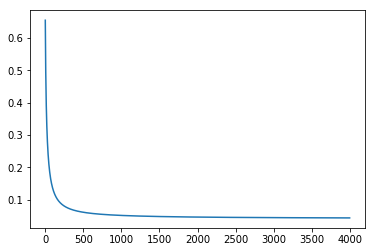

In [68]:
visualize_cost(J_history_Gry)

100%|██████████| 4000/4000 [00:00<00:00, 4323.70it/s]


theta for Hufflepuf House : 
 [-2.13040109  0.05290032  0.21598705  1.33017712  1.43383289 -1.39471287
  0.55448103 -0.91054507 -1.42867096  0.79916737  0.62918718 -0.31565279
 -0.03273585 -0.07793576 -0.51582973]
final cost for Hufflepuf House =  0.05873783814270817


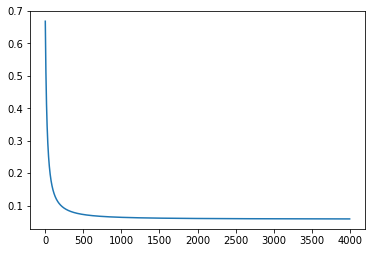

In [69]:
theta = np.zeros(15)
theta_Huf, J_history_Huf = fit(X, y_Huf, theta, 0.05547, 4000)
print("theta for Hufflepuf House : \n", theta_Huf)
print("final cost for Hufflepuf House = ", J_history_Huf[-1])
visualize_cost(J_history_Huf)

100%|██████████| 4000/4000 [00:00<00:00, 4291.54it/s]


theta for Ravenclaw House : 
 [-2.46946897 -0.08518789  0.24380845 -0.7858774   0.6374574   0.77963465
  0.29388896  1.14354958  1.00787571  0.06860864 -0.03366217 -0.01498352
  0.05440004  1.08661611  0.11991826]
final cost for Ravenclaw House =  0.06842498436572621


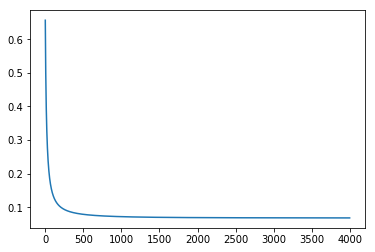

In [70]:
theta = np.zeros(15)
theta_Rav, J_history_Rav = fit(X, y_Rav, theta, 0.05547, 4000)
print("theta for Ravenclaw House : \n" , theta_Rav)
print("final cost for Ravenclaw House = ", J_history_Rav[-1])
visualize_cost(J_history_Rav)

100%|██████████| 4000/4000 [00:00<00:00, 4422.73it/s]


theta for Slytherin : 
 [-3.37430017 -0.12067731  0.00455426 -0.75325172 -0.78721963  0.78211018
 -1.5455607  -0.33594692 -0.65276907 -0.06892176  0.49804559  0.57052789
 -0.10681667 -0.69822904 -0.53394634]
final cost for Slytherin =  0.047820199400678505


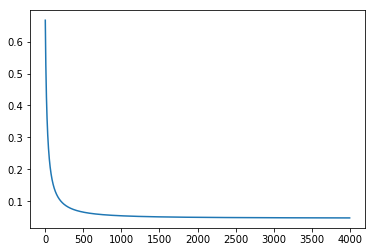

In [71]:
theta = np.zeros(15)
theta_Sly, J_history_Sly = fit(X, y_Sly, theta, 0.05547, 4000)
print("theta for Slytherin : \n" , theta_Sly)
print("final cost for Slytherin = ", J_history_Sly[-1])
visualize_cost(J_history_Sly)

### Save theta coeficients

In [72]:
data_dict = {'Gryffindor': list(theta_Gry), 
             'Hufflepuff': list(theta_Huf), 
             'Ravenclaw': list(theta_Rav), 
             'Slytherin': list(theta_Sly)
            }
print(data_dict)

{'Gryffindor': [-3.159668880663788, 0.2136438730998304, -0.5417432318779802, 0.17466923721913952, -1.1411700481716278, -0.1617800716796964, 0.6773390360001196, -0.06209677569702333, 0.918937510742492, -0.6943719168880481, -0.9534113460096936, -0.1669491356219437, 0.050343536063326456, -0.3078203829709695, 0.8578957318515787], 'Hufflepuff': [-2.130401087531722, 0.05290031824189704, 0.21598704615867886, 1.3301771203323633, 1.4338328883726834, -1.3947128668249247, 0.55448102642084, -0.9105450698909661, -1.4286709608584793, 0.7991673690778655, 0.629187181862718, -0.31565279439786165, -0.03273585348823096, -0.07793575666151706, -0.5158297343222511], 'Ravenclaw': [-2.469468965720508, -0.08518789046875241, 0.2438084450239934, -0.7858774000974986, 0.6374574008330676, 0.7796346506053762, 0.2938889627905619, 1.1435495846171002, 1.0078757141181989, 0.06860863563264942, -0.033662174999073924, -0.014983523456082745, 0.05440004264760284, 1.0866161139624282, 0.11991826244747544], 'Slytherin': [-3.374

In [73]:
save_json (data_dict, "theta_coeficients.json")

In [74]:
data_dict2 = list([
                    data_dict['Gryffindor'], 
                    data_dict['Hufflepuff'], 
                    data_dict['Ravenclaw'], 
                    data_dict['Slytherin']
                   ])
pprint(data_dict2)

[[-3.159668880663788,
  0.2136438730998304,
  -0.5417432318779802,
  0.17466923721913952,
  -1.1411700481716278,
  -0.1617800716796964,
  0.6773390360001196,
  -0.06209677569702333,
  0.918937510742492,
  -0.6943719168880481,
  -0.9534113460096936,
  -0.1669491356219437,
  0.050343536063326456,
  -0.3078203829709695,
  0.8578957318515787],
 [-2.130401087531722,
  0.05290031824189704,
  0.21598704615867886,
  1.3301771203323633,
  1.4338328883726834,
  -1.3947128668249247,
  0.55448102642084,
  -0.9105450698909661,
  -1.4286709608584793,
  0.7991673690778655,
  0.629187181862718,
  -0.31565279439786165,
  -0.03273585348823096,
  -0.07793575666151706,
  -0.5158297343222511],
 [-2.469468965720508,
  -0.08518789046875241,
  0.2438084450239934,
  -0.7858774000974986,
  0.6374574008330676,
  0.7796346506053762,
  0.2938889627905619,
  1.1435495846171002,
  1.0078757141181989,
  0.06860863563264942,
  -0.033662174999073924,
  -0.014983523456082745,
  0.05440004264760284,
  1.0866161139624282,

### Validation

#### Calcul probabilite Class by Class = House by House

In [75]:
probability_Gry = sigmoid(np.dot(X, theta_Gry))
print(probability_Gry.shape)
#print(set(probability_Gry))

(1600,)


In [76]:
probability_Huf = sigmoid(np.dot(X, theta_Huf))
print(probability_Huf.shape)
#print(set(probability_Huf))

(1600,)


In [77]:
probability_Rav = sigmoid(np.dot(X, theta_Rav))
print(probability_Rav.shape)
#print(set(probability_Rav))

(1600,)


In [78]:
probability_Sly = sigmoid(np.dot(X, theta_Sly))
print(probability_Sly.shape)
#print(set(probability_Sly))

(1600,)


#### Classification : 1 if class probability > 0.4 else 0

In [79]:
classifier_Gry = [1 if a > 0.4 else 0 for a in probability_Gry]
print(sum(classifier_Gry))

322


In [80]:
classifier_Huf = [1 if a > 0.4 else 0 for a in probability_Huf]
print(sum(classifier_Huf))

536


In [81]:
classifier_Rav = [1 if a > 0.4 else 0 for a in probability_Rav]
print(sum(classifier_Rav))

446


In [82]:
classifier_Sly = [1 if a > 0.4 else 0 for a in probability_Sly]
print(sum(classifier_Sly))

296


In [83]:
a = 322+536+446+296
a

1600

In [84]:
classifiers = np.array([classifier_Gry, classifier_Huf, classifier_Rav, classifier_Sly])
print(classifiers.shape)

(4, 1600)


### One vs all training

In [85]:
th_coeficients = []
costs = []
for c in range(0, 4):
    theta = np.zeros(15)
    theta, J_history = fit(X, Y[c], theta, 0.05547, 4000)
    print(theta[0:20])
    th_coeficients.append(theta)
    costs.append(J_history)
    #classifiers[c, :] , costs[c, :] = fit(X[:,0:15], y_Gry, theta[0:15], 0.05547, 200000)

 11%|█         | 431/4000 [00:00<00:00, 4309.13it/s]

[-3.15966888  0.21364387 -0.54174323  0.17466924 -1.14117005 -0.16178007
  0.67733904 -0.06209678  0.91893751 -0.69437192 -0.95341135 -0.16694914
  0.05034354 -0.30782038  0.85789573]


 11%|█         | 438/4000 [00:00<00:00, 4370.59it/s]

[-2.13040109  0.05290032  0.21598705  1.33017712  1.43383289 -1.39471287
  0.55448103 -0.91054507 -1.42867096  0.79916737  0.62918718 -0.31565279
 -0.03273585 -0.07793576 -0.51582973]


 11%|█         | 436/4000 [00:00<00:00, 4356.00it/s]

[-2.46946897 -0.08518789  0.24380845 -0.7858774   0.6374574   0.77963465
  0.29388896  1.14354958  1.00787571  0.06860864 -0.03366217 -0.01498352
  0.05440004  1.08661611  0.11991826]


100%|██████████| 4000/4000 [00:00<00:00, 4354.55it/s]

[-3.37430017 -0.12067731  0.00455426 -0.75325172 -0.78721963  0.78211018
 -1.5455607  -0.33594692 -0.65276907 -0.06892176  0.49804559  0.57052789
 -0.10681667 -0.69822904 -0.53394634]


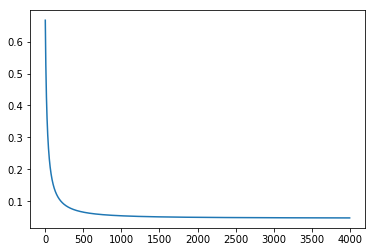

In [86]:
#for J_history in costs :
visualize_cost(costs[3])

In [87]:
pprint(th_coeficients)

[array([-3.15966888,  0.21364387, -0.54174323,  0.17466924, -1.14117005,
       -0.16178007,  0.67733904, -0.06209678,  0.91893751, -0.69437192,
       -0.95341135, -0.16694914,  0.05034354, -0.30782038,  0.85789573]),
 array([-2.13040109,  0.05290032,  0.21598705,  1.33017712,  1.43383289,
       -1.39471287,  0.55448103, -0.91054507, -1.42867096,  0.79916737,
        0.62918718, -0.31565279, -0.03273585, -0.07793576, -0.51582973]),
 array([-2.46946897, -0.08518789,  0.24380845, -0.7858774 ,  0.6374574 ,
        0.77963465,  0.29388896,  1.14354958,  1.00787571,  0.06860864,
       -0.03366217, -0.01498352,  0.05440004,  1.08661611,  0.11991826]),
 array([-3.37430017, -0.12067731,  0.00455426, -0.75325172, -0.78721963,
        0.78211018, -1.5455607 , -0.33594692, -0.65276907, -0.06892176,
        0.49804559,  0.57052789, -0.10681667, -0.69822904, -0.53394634])]


In [88]:
th_coeficients = np.array(th_coeficients)
print(th_coeficients.shape)

(4, 15)


### One vs all Validation

In [89]:
#test formula
probability = sigmoid(np.dot(X, th_coeficients[0]))
pprint(probability.shape)
pprint(probability[0:30])
pprint(set(probability))

(1600,)
array([0.00326345, 0.0013244 , 0.00700928, 0.99660871, 0.98108014,
       0.00568155, 0.99759794, 0.02780118, 0.99883728, 0.002872  ,
       0.03944517, 0.00500013, 0.06333748, 0.00277402, 0.01833184,
       0.01774395, 0.98016746, 0.99345326, 0.01205742, 0.00512535,
       0.99308874, 0.96559371, 0.0070123 , 0.1019307 , 0.00247101,
       0.00575169, 0.00229296, 0.08596995, 0.97711759, 0.0015721 ])
{0.00014967595703207194,
 0.0002259147612362841,
 0.00022604430098963955,
 0.00033963692926922194,
 0.00034860565382976544,
 0.0003873216438398783,
 0.00039067831592271723,
 0.00040017029272859753,
 0.0004191921102803644,
 0.0004314130420945518,
 0.0004377528550877729,
 0.00044294576384686985,
 0.00046073693514653736,
 0.0004772705398955577,
 0.00048527576307273295,
 0.0004925265006196974,
 0.0004962817149353146,
 0.0005019703889255183,
 0.0005021038836711154,
 0.0005157441899265965,
 0.000520688773192331,
 0.0005254532762366257,
 0.0005297377293212978,
 0.0005308015028306039,
 0.00

In [90]:
#classProbabilities = sigmoid(X * classifiers.T)
classProbabilities = []
for i in range(0,4):
    probability = sigmoid(np.dot(X, th_coeficients[i]))
    print(probability.shape)
    print(probability[0:30])
    classProbabilities.append(probability)


(1600,)
[0.00326345 0.0013244  0.00700928 0.99660871 0.98108014 0.00568155
 0.99759794 0.02780118 0.99883728 0.002872   0.03944517 0.00500013
 0.06333748 0.00277402 0.01833184 0.01774395 0.98016746 0.99345326
 0.01205742 0.00512535 0.99308874 0.96559371 0.0070123  0.1019307
 0.00247101 0.00575169 0.00229296 0.08596995 0.97711759 0.0015721 ]
(1600,)
[1.98618816e-02 9.78555353e-03 6.18491887e-03 1.74217244e-02
 5.18185779e-04 1.53434147e-03 8.66362793e-03 8.88974049e-01
 3.67049304e-03 9.97163830e-01 9.52365026e-01 9.62241379e-01
 9.69846255e-01 1.30093188e-03 9.52111463e-03 6.30680903e-04
 4.22285409e-03 5.97295051e-03 2.52240422e-02 9.93436682e-01
 1.47204362e-02 3.72468017e-02 6.69322887e-03 9.58733392e-01
 5.25602103e-03 9.76414529e-01 3.92172411e-03 9.34750220e-01
 1.88535443e-03 9.96970833e-01]
(1600,)
[9.47377386e-01 5.96082036e-03 9.89550590e-01 5.84217453e-04
 6.61952661e-03 1.20268186e-02 6.83499947e-04 9.90758101e-03
 2.83950455e-03 5.03515776e-03 1.11708334e-02 8.03032340e-03

In [91]:
classProbabilities = np.array(classProbabilities)
print(classProbabilities.shape)
print(classProbabilities[1].shape)

(4, 1600)
(1600,)


#### Classifying with a loop : Find  the best class/House for each student with a loop

In [92]:
ClassifiersB = []
for i in range (0,4):
    classifier = [1 if a > 0.4 else 0 for a in classProbabilities[i]]
    pprint(set(classifier))
    pprint(sum(classifier))
    ClassifiersB.append(classifier)

ClassifiersB = np.array(ClassifiersB)
print(ClassifiersB.shape)
sum(sum(ClassifiersB))

{0, 1}
322
{0, 1}
536
{0, 1}
446
{0, 1}
296
(4, 1600)


1600

In [93]:
print(ClassifiersB.shape)
predictionsB = []
for raw in ClassifiersB.T :
    for index, classe in enumerate(raw) :
        if classe == 1 :
            predictionsB.append(index)  
print(np.array(predictionsB).shape)
print(set(predictionsB))


(4, 1600)
(1600,)
{0, 1, 2, 3}


In [94]:
predictionsB = np.array(predictionsB)
print(predictionsB.shape)
print(predictionsB[0:200])

(1600,)
[2 3 2 0 0 3 0 1 0 1 1 1 1 3 2 2 0 0 2 1 0 0 2 1 2 1 3 1 0 1 1 0 2 1 2 2 1
 1 3 0 0 1 2 1 1 2 2 1 3 0 0 3 3 2 0 3 1 3 1 0 3 2 1 1 1 1 1 2 0 1 2 3 3 1
 2 1 2 2 1 1 1 3 3 0 1 1 1 1 1 0 0 0 2 1 1 1 0 2 3 1 0 1 2 1 2 0 3 0 1 3 3
 2 2 2 2 0 2 3 1 1 2 3 2 1 1 3 1 3 3 1 3 0 3 1 2 2 2 2 1 0 0 2 0 1 0 0 3 0
 0 0 2 0 0 3 3 1 0 1 2 2 1 1 1 3 2 1 1 1 3 0 2 0 0 2 1 0 2 1 2 2 3 1 2 3 3
 1 1 3 1 0 3 1 2 1 3 1 1 2 0 3]


#### Classifier avec une sum de matrice

In [95]:
ClassifiersM = []
for i in range (0,4):
    classifier = [(i+1) if a > 0.4 else 0 for a in classProbabilities[i]]
    pprint(set(classifier))
    ClassifiersM.append(classifier)
ClassifiersM = np.array(ClassifiersM)
print(sum(ClassifiersM))
print(sum(sum(ClassifiersM)))
predictionsM = sum(ClassifiersM)-1

{0, 1}
{0, 2}
{0, 3}
{0, 4}
[3 4 3 ... 1 2 2]
3916


In [96]:
predictionsM = np.array(predictionsM)
print(predictionsM.shape)
print(predictionsM[0:200])
#print(predictionsM)

(1600,)
[2 3 2 0 0 3 0 1 0 1 1 1 1 3 2 2 0 0 2 1 0 0 2 1 2 1 3 1 0 1 1 0 2 1 2 2 1
 1 3 0 0 1 2 1 1 2 2 1 3 0 0 3 3 2 0 3 1 3 1 0 3 2 1 1 1 1 1 2 0 1 2 3 3 1
 2 1 2 2 1 1 1 3 3 0 1 1 1 1 1 0 0 0 2 1 1 1 0 2 3 1 0 1 2 1 2 0 3 0 1 3 3
 2 2 2 2 0 2 3 1 1 2 3 2 1 1 3 1 3 3 1 3 0 3 1 2 2 2 2 1 0 0 2 0 1 0 0 3 0
 0 0 2 0 0 3 3 1 0 1 2 2 1 1 1 3 2 1 1 1 3 0 2 0 0 2 1 0 2 1 2 2 3 1 2 3 3
 1 1 3 1 0 3 1 2 1 3 1 1 2 0 3]


### Recode Empirical Results

In [97]:
y_recoded = y_texte.copy()
y_recoded = [0 if el == 'Gryffindor' else el for el in y_recoded]
y_recoded = [1 if el == 'Hufflepuff' else el for el in y_recoded]
y_recoded = [2 if el == 'Ravenclaw' else el for el in y_recoded]
y_recoded = [3 if el == 'Slytherin' else el for el in y_recoded]

In [98]:
print(len(y_recoded))
y_recoded = np.array(y_recoded)
print(y_recoded.shape)

1600
(1600,)


In [99]:
print(y_recoded[0:200])

[2 3 2 0 0 3 0 1 0 1 1 1 1 3 2 2 0 0 2 1 0 0 2 1 2 1 3 1 0 1 1 0 2 1 2 2 1
 1 3 0 0 1 2 1 1 2 2 1 3 0 0 3 3 2 0 3 1 3 1 0 3 2 1 1 1 1 1 2 0 1 2 3 3 1
 2 1 2 2 1 1 1 3 3 0 1 1 1 1 1 0 0 0 2 1 1 1 0 2 3 1 0 1 2 1 2 0 3 0 1 3 3
 2 2 2 2 0 2 3 1 1 2 3 2 1 1 3 1 3 3 1 3 0 3 1 2 2 2 2 1 0 0 2 0 1 0 0 3 0
 0 0 2 0 0 3 3 1 0 1 2 2 1 1 1 3 2 1 1 1 3 0 2 0 0 2 1 0 2 1 2 2 3 1 2 3 2
 1 1 3 1 0 3 1 2 1 3 1 1 2 0 3]


### Compare two methods of calcul prediction (loop and Matrix)

In [100]:
check1  = predictionsB - predictionsM
print("number of differences calculated in check1 should be 1600 " , len(check1))
print("check1 values example : ", check1[:30])
print("sum of check1 differences = ", sum(np.absolute(check1)))
print("check1 differences set : ", set(check1))
errors = []
for index, value in enumerate(check1):
    if value != 0 :
        errors.append(index)
print("len errors = " , len(errors))
print("errors indexes : ", errors)
error_rate = len(errors)/len(predictionsB)
print("error rate ", error_rate)

number of differences calculated in check1 should be 1600  1600
check1 values example :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
sum of check1 differences =  0
check1 differences set :  {0}
len errors =  0
errors indexes :  []
error rate  0.0


### Compare validation results with empirical results

In [101]:
check2 = predictionsM - y_recoded
print("number of differences calculated in check2=1600 " , len(check2))
print("check2 values example : ", check2[:30])
print("sum of check2 differences = ", sum(np.absolute(check2)))
print("check2 differences set : ", set(check2))
errors = []
for index, value in enumerate(check2):
    if value != 0 :
        errors.append(index)
print("number of errors cases = " , len(errors))
print("errors indexes : ", errors)
error_rate = len(errors)/len(y_recoded)
print("error rate matrix ", error_rate)

number of differences calculated in check2=1600  1600
check2 values example :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
sum of check2 differences =  40
check2 differences set :  {0, 1, 2, -2, -1}
number of errors cases =  29
errors indexes :  [184, 200, 255, 339, 445, 456, 504, 515, 618, 681, 704, 815, 820, 824, 915, 941, 1078, 1098, 1113, 1191, 1282, 1419, 1435, 1444, 1446, 1448, 1515, 1525, 1596]
error rate matrix  0.018125


In [102]:
check3 = predictionsB - y_recoded
print("number of differences calculated in check3=1600 " , len(check3))
print("check3 values example : ", check3[:30])
print("sum of check3 differences = ", sum(np.absolute(check3)))
print("check3 differences set : ", set(check3))
errors = []
for index, value in enumerate(check3):
    if value != 0 :
        errors.append(index)
print("number of errors cases = " , len(errors))
print("errors indexes : ", errors)
error_rate = len(errors)/len(predictionsB)
print("error rate boucle ", error_rate)

number of differences calculated in check3=1600  1600
check3 values example :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
sum of check3 differences =  40
check3 differences set :  {0, 1, 2, -2, -1}
number of errors cases =  29
errors indexes :  [184, 200, 255, 339, 445, 456, 504, 515, 618, 681, 704, 815, 820, 824, 915, 941, 1078, 1098, 1113, 1191, 1282, 1419, 1435, 1444, 1446, 1448, 1515, 1525, 1596]
error rate boucle  0.018125


In [103]:
y_texte

['Ravenclaw',
 'Slytherin',
 'Ravenclaw',
 'Gryffindor',
 'Gryffindor',
 'Slytherin',
 'Gryffindor',
 'Hufflepuff',
 'Gryffindor',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Slytherin',
 'Ravenclaw',
 'Ravenclaw',
 'Gryffindor',
 'Gryffindor',
 'Ravenclaw',
 'Hufflepuff',
 'Gryffindor',
 'Gryffindor',
 'Ravenclaw',
 'Hufflepuff',
 'Ravenclaw',
 'Hufflepuff',
 'Slytherin',
 'Hufflepuff',
 'Gryffindor',
 'Hufflepuff',
 'Hufflepuff',
 'Gryffindor',
 'Ravenclaw',
 'Hufflepuff',
 'Ravenclaw',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Slytherin',
 'Gryffindor',
 'Gryffindor',
 'Hufflepuff',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Ravenclaw',
 'Ravenclaw',
 'Hufflepuff',
 'Slytherin',
 'Gryffindor',
 'Gryffindor',
 'Slytherin',
 'Slytherin',
 'Ravenclaw',
 'Gryffindor',
 'Slytherin',
 'Hufflepuff',
 'Slytherin',
 'Hufflepuff',
 'Gryffindor',
 'Slytherin',
 'Ravenclaw',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Hufflepuff',
 'Ravenclaw',
 'Gryff

In [122]:
switcher = {0:'Gryffindor', 2:'Ravenclaw', 3:'Slytherin', 1:'Hufflepuff'}
predictions_temp = predictionsM.copy()
predictions_texte = predictionsM.copy()
for i in range (0,4) :
    predictions_texte = np.where(predictions_temp==i, switcher[i], predictions_texte)
predictions_texte = list(predictions_texte)
set(predictions_texte)

{'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'}

In [123]:
print(y_texte[:100])

['Ravenclaw', 'Slytherin', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Hufflepuff', 'Gryffindor', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Slytherin', 'Ravenclaw', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Ravenclaw', 'Hufflepuff', 'Gryffindor', 'Gryffindor', 'Ravenclaw', 'Hufflepuff', 'Ravenclaw', 'Hufflepuff', 'Slytherin', 'Hufflepuff', 'Gryffindor', 'Hufflepuff', 'Hufflepuff', 'Gryffindor', 'Ravenclaw', 'Hufflepuff', 'Ravenclaw', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff', 'Ravenclaw', 'Ravenclaw', 'Hufflepuff', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Slytherin', 'Ravenclaw', 'Gryffindor', 'Slytherin', 'Hufflepuff', 'Slytherin', 'Hufflepuff', 'Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Ravenclaw', 'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin', 'Slytherin', 'Huffle

In [124]:
print(predictions_texte[:100])

['Ravenclaw', 'Slytherin', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Hufflepuff', 'Gryffindor', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Slytherin', 'Ravenclaw', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Ravenclaw', 'Hufflepuff', 'Gryffindor', 'Gryffindor', 'Ravenclaw', 'Hufflepuff', 'Ravenclaw', 'Hufflepuff', 'Slytherin', 'Hufflepuff', 'Gryffindor', 'Hufflepuff', 'Hufflepuff', 'Gryffindor', 'Ravenclaw', 'Hufflepuff', 'Ravenclaw', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff', 'Ravenclaw', 'Ravenclaw', 'Hufflepuff', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Slytherin', 'Ravenclaw', 'Gryffindor', 'Slytherin', 'Hufflepuff', 'Slytherin', 'Hufflepuff', 'Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Hufflepuff', 'Ravenclaw', 'Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin', 'Slytherin', 'Huffle

In [135]:
errors = []
for i in range (0, len(y_texte)) :
    if y_texte[i] != predictions_texte[i] :
        errors.append(i)
print("PREDICTIONS AFTER LEARNING : \n")
print("good predictions for ", len(y_texte)-len(errors), " students")
print("wrong predictions for ", len(errors), " students")
error_rate = len(errors)/len(y_texte)
print("error rate = ", error_rate)
print("students witch wrong prediction :", errors)

PREDICTIONS AFTER LEARNING : 

good predictions for  1571  students
wrong predictions for  29  students
error rate =  0.018125
students witch wrong prediction : [184, 200, 255, 339, 445, 456, 504, 515, 618, 681, 704, 815, 820, 824, 915, 941, 1078, 1098, 1113, 1191, 1282, 1419, 1435, 1444, 1446, 1448, 1515, 1525, 1596]
